# MSCS 634: Data Science and Machine Learning
## Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis

**Name:** Rachna Bhattarai

**Date:** May 16, 2025

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')
# Display the first five rows
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


# Step 2: Data Visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for the plots
sns.set_style("whitegrid")

1. Scatter Plot (Age vs. Cholesterol)

     By observing this scatter plot, we can look for any apparent trends or clusters. For instance, are older individuals more likely to have higher cholesterol? Does the presence of heart disease (indicated by the color) seem to correlate with specific age or cholesterol ranges?

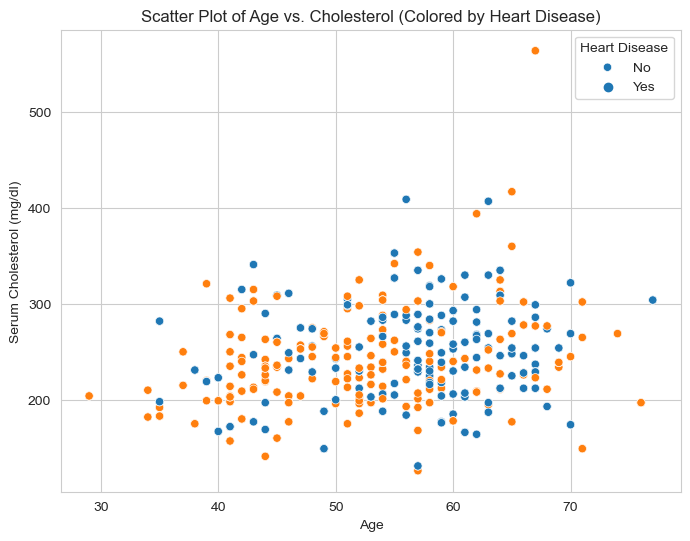

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=df)
plt.title('Scatter Plot of Age vs. Cholesterol (Colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

2. Bar Chart (Heart Disease by Sex)
    
    This bar chart allows us to directly compare the number of males and females with and without heart disease. We can see if one gender appears to be more affected than the other in this dataset.

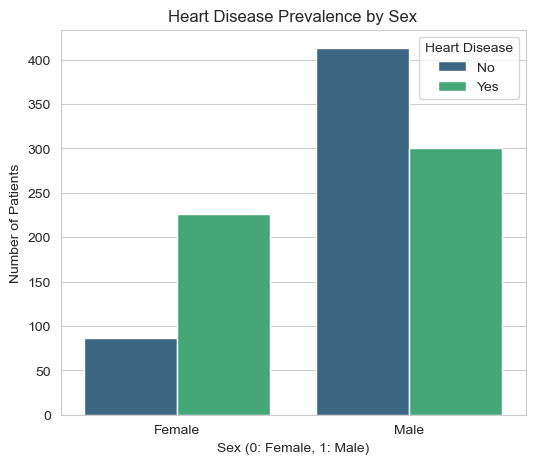

In [5]:
plt.figure(figsize=(6, 5))
sns.countplot(x='sex', hue='target', data=df, palette='viridis')
plt.title('Heart Disease Prevalence by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

3. Histogram (Age Distribution)

    Visualize the distribution of patient ages.

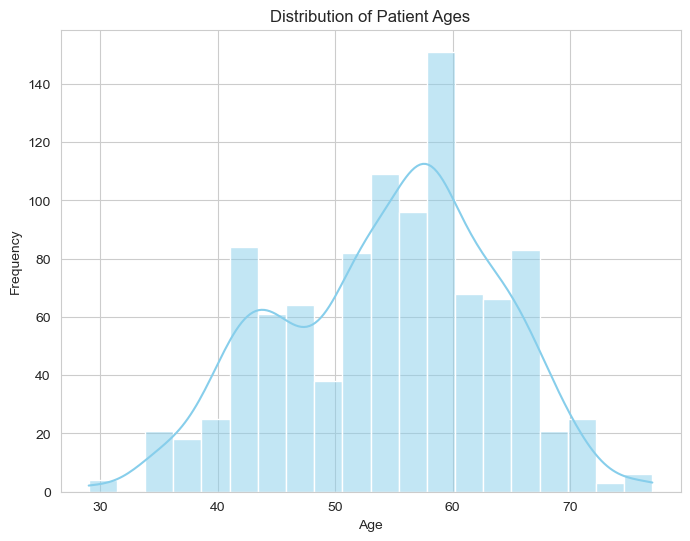

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

4. Box Plot (Cholesterol Levels)

    here, we visualize the spread and identify potential outliers in cholesterol levels.

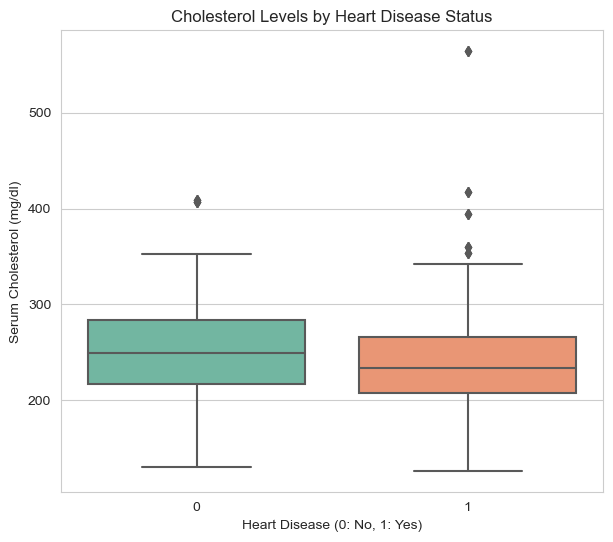

In [7]:
plt.figure(figsize=(7, 6))
sns.boxplot(y='chol', x='target', data=df, palette='Set2')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()

5. Pie Chart (Proportion of Patients with Heart Disease)

    we can also show the proportion of patients with and without heart disease.



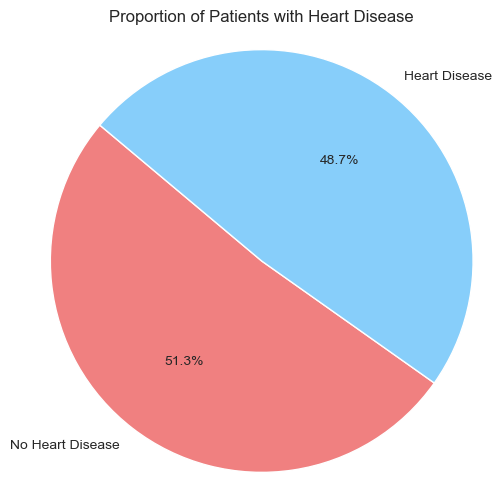

In [9]:
plt.figure(figsize=(6, 6))
target_counts = df['target'].value_counts()
plt.pie(target_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Patients with Heart Disease')
plt.axis('equal')  
plt.show()

# Step 3: Data Preprocessing



1. Handling Missing Values

    there is no missing data in the dataset

In [22]:
# Detect missing values
print("Missing values before handling:")
print(df.isnull().sum())
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


2. Outlier Detection and Removal (using IQR for 'chol')

In [13]:
# Outlier detection using IQR for 'chol'
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)]
print("\nIQR Calculation:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print("\nIdentified Outliers in 'chol':")
print(outliers)

# Remove outliers (optional - consider the impact before removing)
df_no_outliers = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)].copy()
print("\nDataFrame shape before outlier removal:", df.shape)
print("DataFrame shape after outlier removal:", df_no_outliers.shape)


IQR Calculation:
Q1: 211.0, Q3: 275.0, IQR: 64.0, Lower Bound: 115.0, Upper Bound: 371.0

Identified Outliers in 'chol':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
192   67    0   2       115   564    0        0      160      0      1.6   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   
464   67    0   2       115   564    0        0      160      0      1.6   
481   63    0   0       150   407    0        0      154      0      4.0   
542   62    0   0       140   394    0        0      157      0      1.2   
578   62    0   0       140   394    0        0      157      0      1.2   
641   56    0   0       134   409    0    

3. Data Reduction (Dropping a Less Relevant Column - Hypothetically 'restecg')

In [14]:
# Assuming 'restecg' is deemed less relevant for this example
df_reduced = df.drop(columns=['restecg']).copy()
print("\nDataFrame columns before reduction:", df.columns.tolist())
print("DataFrame columns after reduction:", df_reduced.columns.tolist())


DataFrame columns before reduction: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
DataFrame columns after reduction: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


4. Data Scaling (Min-Max Scaling for 'age' and 'trestbps')

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_reduced.copy() # Use the potentially reduced DataFrame

# Apply Min-Max scaling to 'age' and 'trestbps'
df_scaled[['age_scaled', 'trestbps_scaled']] = scaler.fit_transform(df_scaled[['age', 'trestbps']])

print("\nDataFrame before scaling (sample):")
print(df_scaled[['age', 'trestbps']].head())
print("\nDataFrame after Min-Max scaling (sample):")
print(df_scaled[['age_scaled', 'trestbps_scaled']].head())


DataFrame before scaling (sample):
   age  trestbps
0   52       125
1   53       140
2   70       145
3   61       148
4   62       138

DataFrame after Min-Max scaling (sample):
   age_scaled  trestbps_scaled
0    0.479167         0.292453
1    0.500000         0.433962
2    0.854167         0.481132
3    0.666667         0.509434
4    0.687500         0.415094


5. Data Discretization (Discretizing 'age' into categories)

In [16]:
# Discretize 'age' into categories
bins = [20, 35, 50, 65, 80]
labels = ['Young Adult', 'Middle-Aged', 'Older Adult', 'Senior']
df_discretized = df_scaled.copy() # Use the potentially scaled DataFrame
df_discretized['age_category'] = pd.cut(df_discretized['age'], bins=bins, labels=labels, right=False)

print("\nDataFrame before discretization (sample of 'age'):")
print(df_discretized['age'].head())
print("\nDataFrame after discretization (sample of 'age_category'):")
print(df_discretized['age_category'].head())


DataFrame before discretization (sample of 'age'):
0    52
1    53
2    70
3    61
4    62
Name: age, dtype: int64

DataFrame after discretization (sample of 'age_category'):
0    Older Adult
1    Older Adult
2         Senior
3    Older Adult
4    Older Adult
Name: age_category, dtype: category
Categories (4, object): ['Young Adult' < 'Middle-Aged' < 'Older Adult' < 'Senior']


# Step 4: Statistical Analysis

1. General Overview (.info() and .describe())

In [17]:
print("\nDataset Information:")
df_discretized.info()

print("\nDataset Description:")
print(df_discretized.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              1025 non-null   int64   
 1   sex              1025 non-null   int64   
 2   cp               1025 non-null   int64   
 3   trestbps         1025 non-null   int64   
 4   chol             1025 non-null   int64   
 5   fbs              1025 non-null   int64   
 6   thalach          1025 non-null   int64   
 7   exang            1025 non-null   int64   
 8   oldpeak          1025 non-null   float64 
 9   slope            1025 non-null   int64   
 10  ca               1025 non-null   int64   
 11  thal             1025 non-null   int64   
 12  target           1025 non-null   int64   
 13  age_scaled       1025 non-null   float64 
 14  trestbps_scaled  1025 non-null   float64 
 15  age_category     1025 non-null   category
dtypes: category(1), floa

2. Central Tendency Measures

In [18]:
print("\nCentral Tendency Measures:")
print(f"Mean Age: {df_discretized['age'].mean():.2f}")
print(f"Median Age: {df_discretized['age'].median()}")
print(f"Mode Age: {df_discretized['age'].mode().iloc[0]}") # Handle potential multiple modes

print(f"\nMean Cholesterol: {df_discretized['chol'].mean():.2f}")
print(f"Median Cholesterol: {df_discretized['chol'].median()}")
print(f"Mode Cholesterol: {df_discretized['chol'].mode().iloc[0]}")


Central Tendency Measures:
Mean Age: 54.43
Median Age: 56.0
Mode Age: 58

Mean Cholesterol: 246.00
Median Cholesterol: 240.0
Mode Cholesterol: 204


3. Dispersion Measures

In [19]:
print("\nDispersion Measures:")
age_range = df_discretized['age'].max() - df_discretized['age'].min()
print(f"Age Range: {age_range}")
print(f"Age Quartiles:\n{df_discretized['age'].quantile([0.25, 0.50, 0.75])}")
age_iqr = df_discretized['age'].quantile(0.75) - df_discretized['age'].quantile(0.25)
print(f"Age IQR: {age_iqr}")
print(f"Age Variance: {df_discretized['age'].var():.2f}")
print(f"Age Standard Deviation: {df_discretized['age'].std():.2f}")

chol_range = df_discretized['chol'].max() - df_discretized['chol'].min()
print(f"\nCholesterol Range: {chol_range}")
print(f"Cholesterol Quartiles:\n{df_discretized['chol'].quantile([0.25, 0.50, 0.75])}")
chol_iqr = df_discretized['chol'].quantile(0.75) - df_discretized['chol'].quantile(0.25)
print(f"Cholesterol IQR: {chol_iqr}")
print(f"Cholesterol Variance: {df_discretized['chol'].var():.2f}")
print(f"Cholesterol Standard Deviation: {df_discretized['chol'].std():.2f}")


Dispersion Measures:
Age Range: 48
Age Quartiles:
0.25    48.0
0.50    56.0
0.75    61.0
Name: age, dtype: float64
Age IQR: 13.0
Age Variance: 82.31
Age Standard Deviation: 9.07

Cholesterol Range: 438
Cholesterol Quartiles:
0.25    211.0
0.50    240.0
0.75    275.0
Name: chol, dtype: float64
Cholesterol IQR: 64.0
Cholesterol Variance: 2661.79
Cholesterol Standard Deviation: 51.59


4. Correlation Analysis

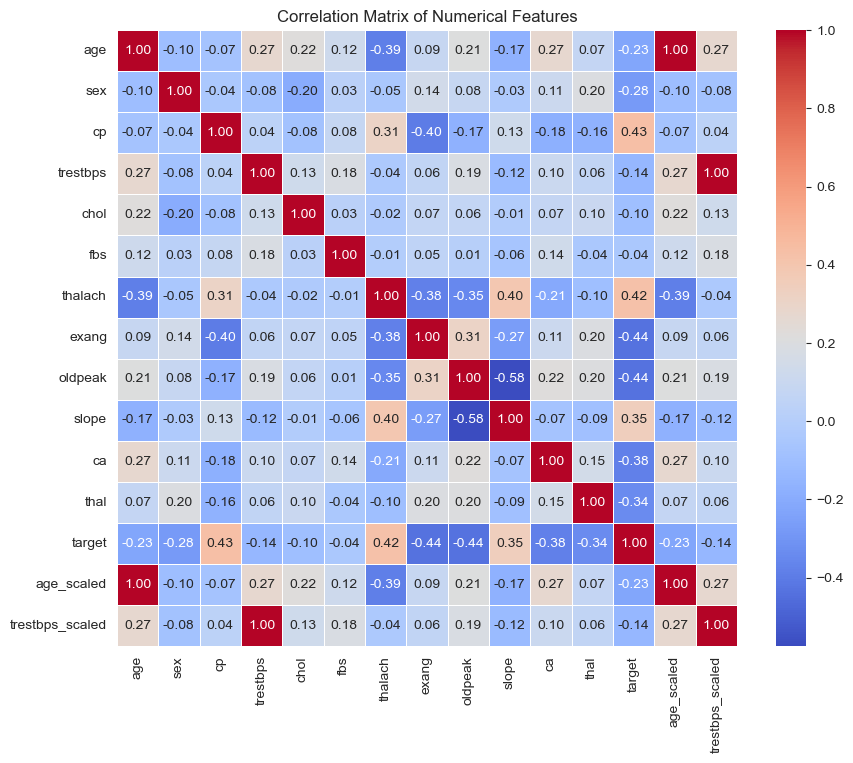

In [24]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df_discretized.select_dtypes(include=['number']).corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()